In [1]:
from typing import Optional, Union
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from model.MatrixRegressor import MatrixRegressor
from model.utils import batch_mat_prod, cross_valid

### **Generate Data**

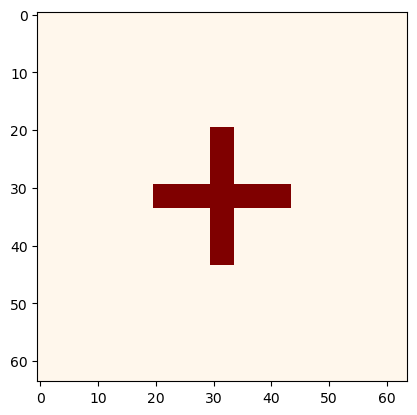

In [30]:
# generate mu
N = 300
X = np.random.randn(N,64,64)
X_test = np.random.randn(500,64,64)
# coef
coef = np.zeros((64,64))
coef[30:34,20:44] = 1
coef[20:44,30:34] = 1
# coef[16:48,16:48] = 1
# coef[16:48,16:48] = 1
# label
y = batch_mat_prod(X,coef) + np.random.randn(N)
y_test = batch_mat_prod(X_test,coef) + np.random.randn(500)
y = (y - y.mean()) / y.std() # scaled
y_test = (y_test - y_test.mean()) / y_test.std()
# show image
plt.imshow(coef,cmap=plt.cm.OrRd)

### **Nesterov Matrix Lasso**

SSE:  431.835918334677
rank:  32


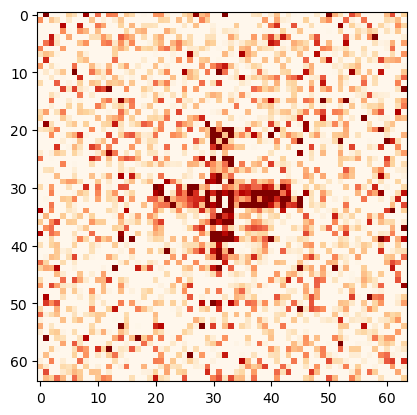

In [38]:
model_mr = MatrixRegressor(_lambda=0.4,penalty='nuclear',max_steps=100)
model_mr.fit(X,y)
print("SSE: ",np.sum((model_mr.predict(X_test) - y_test)**2))
print("rank: ",np.sum(model_mr.singular_vals > 0))
# _, eigvals, _ = np.linalg.svd(model_mr._coef)
# print("rank of coef: ",np.sum(eigvals > 0))
plt.imshow(model_mr.coef_,cmap=plt.cm.OrRd,
           vmin=0,vmax=0.5*np.max(model_mr.coef_))

SSE:  464.8399568674275
rank:  64


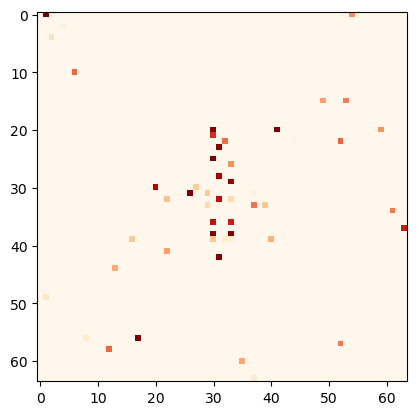

In [36]:
model_mr = MatrixRegressor(_lambda=0.1,penalty='lasso')
model_mr.fit(X,y)
print("SSE: ",np.sum((model_mr.predict(X_test) - y_test)**2))
print("rank: ",np.sum(model_mr.singular_vals > 0))
# _, eigvals, _ = np.linalg.svd(model_mr._coef)
# print("rank of coef: ",np.sum(eigvals > 0))
plt.imshow(model_mr.coef_,cmap=plt.cm.OrRd,
           vmin=0,vmax=0.5*np.max(model_mr.coef_))

### **Cross Validation**

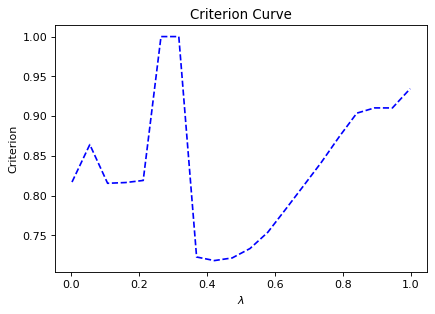

In [39]:
model_mr = MatrixRegressor(_lambda=0.4,penalty='nuclear',max_steps=100)
best_lambda = model_mr.tuning(X=X,y=y,transfer=False,lambda_max_ratio=6,num_grids=20,show=True,folds=10)

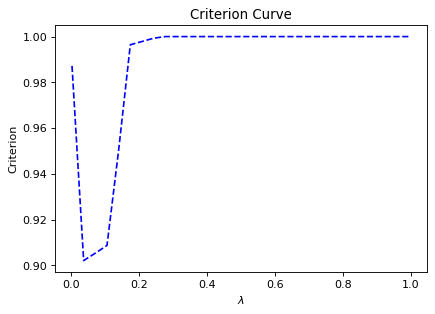

In [34]:
model_mr = MatrixRegressor(_lambda=0.4,penalty='lasso',max_steps=100)
best_lambda = model_mr.tuning(X=X,y=y,transfer=False,lambda_max_ratio=6,num_grids=30,show=True,folds=10)

### **Matrix Lasso Path**

Estimate variance of noise...
The estimated variance of noise is 0.01
Using BIC as criterion for regression task
Estimate Lipschitz constant...


Training for lambda = 0.95, Rank of the estimated coef : 3: 100%|███████████████████████| 20/20 [00:01<00:00, 14.94it/s]

Best penalty lambda is 0.5000


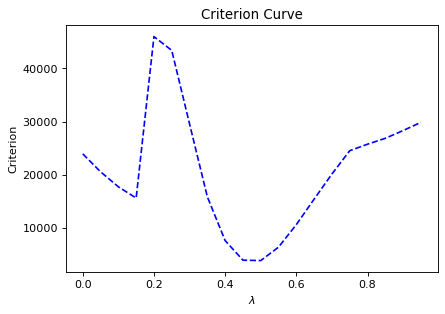

In [6]:
model_mr = MatrixRegressor(_lambda=0.5,penalty='nuclear')
model_mr.tuning(X,y,criterion="BIC",bound=[0,1],step=0.05,tau=8,show=True)

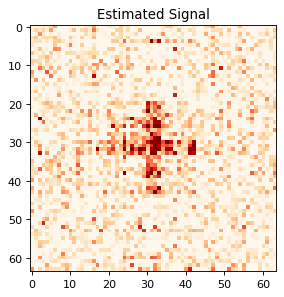

In [7]:
model_mr.show_signal()